# Quality prediction of white wine

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [19]:
white_wine_original= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [20]:
white_wine=white_wine_original.copy()
white_wine_heatmap=white_wine_original.copy()

# we are creating a new column called "quality_label", we define a range and associate that range with a label
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: '0low'
if value <= 5 else '1medium'
if value <= 7 else '2high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['0low', '1medium', '2high'])


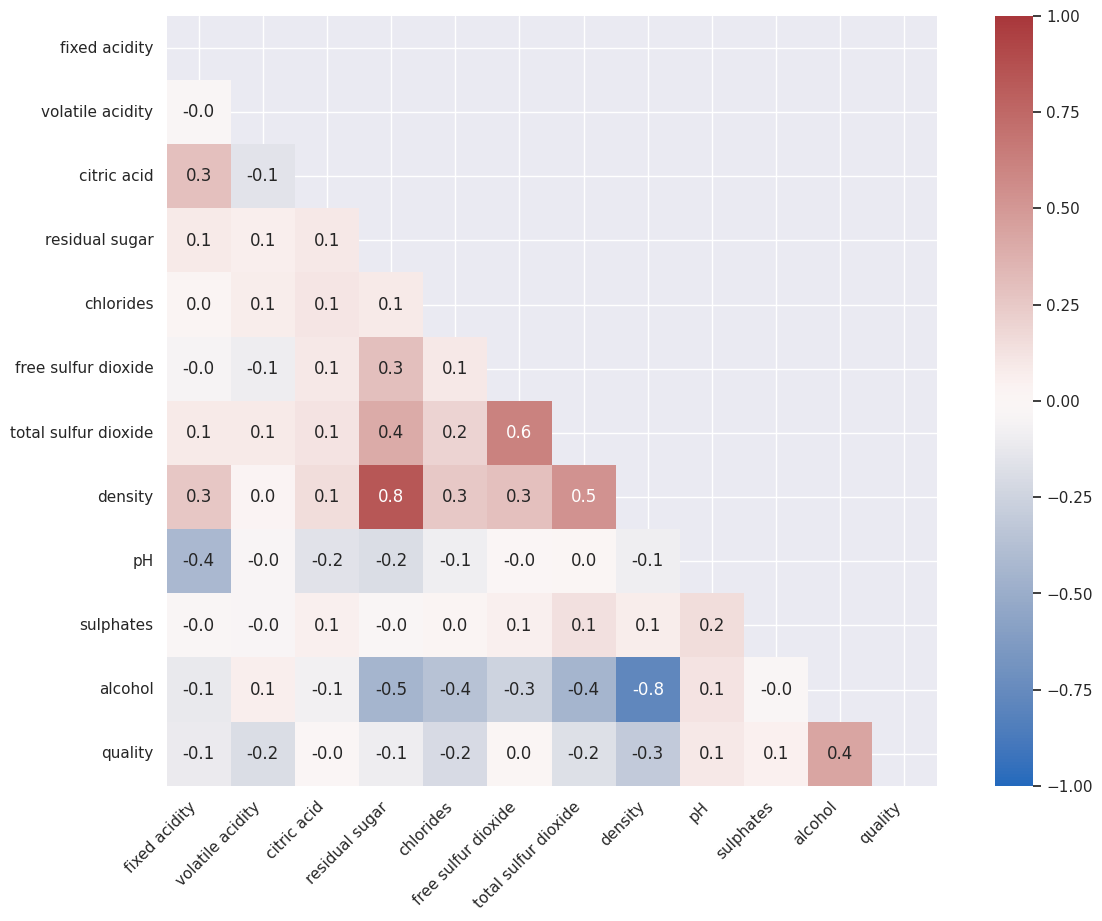

In [21]:
wines_mx=white_wine_heatmap.corr()


# creating mask
mask = np.triu(np.ones_like(wines_mx))


ax=sns.heatmap(
    wines_mx,
    annot=True,fmt=".1f",
    square=True,
    mask=mask,
    cmap='vlag',
    vmin = -1,
    vmax = 1
)


ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
sns.set(rc = {'figure.figsize':(15,10)})

In [22]:
from sklearn.preprocessing import LabelEncoder

#cheque for unique values in quality_label column

white_wine['quality_label'].unique()


le = LabelEncoder()


le.fit(white_wine[['quality_label']])

print(le.classes_)

df_transformed_quality=pd.DataFrame(le.transform(white_wine[['quality_label']]))

#print(df_transformed_quality)

enc_wines_ml=white_wine.copy()

#print(enc_wines_ml2['quality_label'])

#replace quality label with encoded values
enc_wines_ml['quality_label']=df_transformed_quality

le.inverse_transform([0,0, 1, 2])
le.transform(["0low", "0low", "1medium"])



enc_wines_ml.head()

['0low' '1medium' '2high']


/home/zsuzsa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/zsuzsa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [23]:
enc_wines_ml=enc_wines_ml.drop(columns=['citric acid', 'total sulfur dioxide', 'quality', 'residual sugar', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'fixed acidity'])
enc_wines_ml.describe()

,volatile acidity,chlorides,alcohol,quality_label
count,4898.000000,4898.000000,4898.000000,4898.000000
mean,0.278241,0.045772,10.514267,0.701919
std,0.100795,0.021848,1.230621,0.531776
min,0.080000,0.009000,8.000000,0.000000
25%,0.210000,0.036000,9.500000,0.000000
50%,0.260000,0.043000,10.400000,1.000000
75%,0.320000,0.050000,11.400000,1.000000
max,1.100000,0.346000,14.200000,2.000000


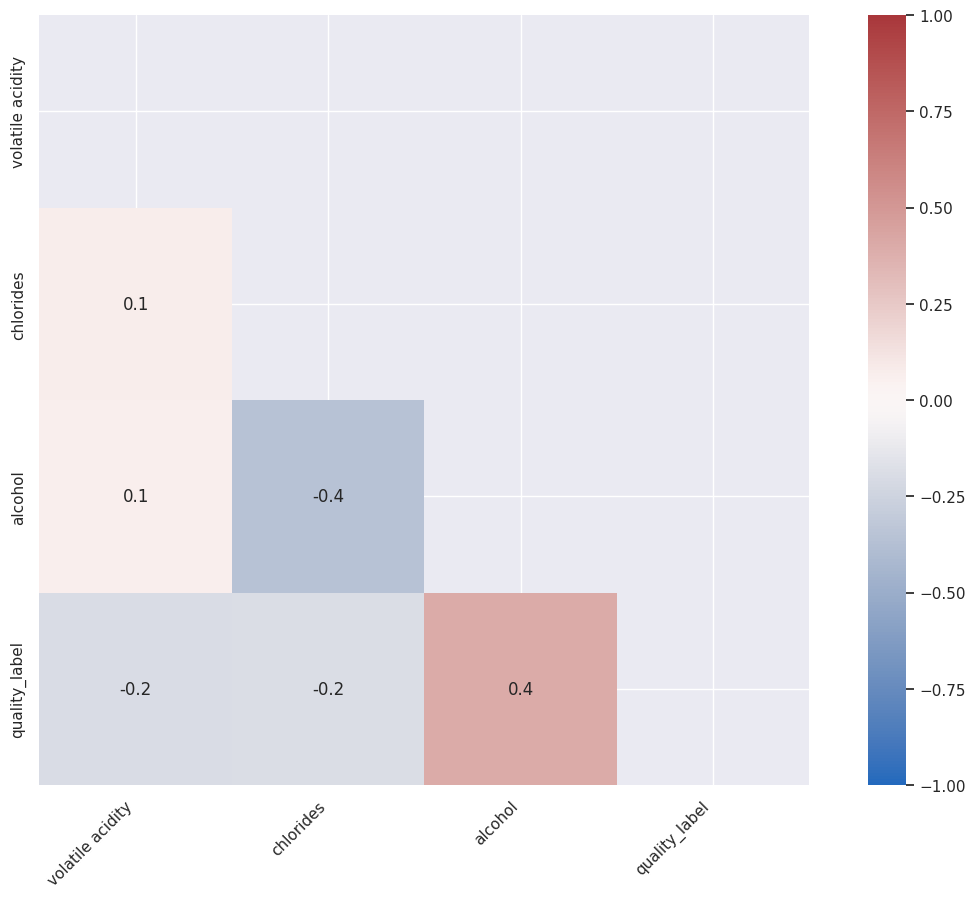

In [24]:
wines_mx=enc_wines_ml.corr()


# creating mask
mask = np.triu(np.ones_like(wines_mx))


ax=sns.heatmap(
    wines_mx,
    annot=True,fmt=".1f",
    square=True,
    mask=mask,
    cmap='vlag',
    vmin = -1,
    vmax = 1
)


ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
sns.set(rc = {'figure.figsize':(15,10)})

In [27]:
from sklearn.model_selection import train_test_split

X=enc_wines_ml.copy()


# Example:
y=enc_wines_ml[['quality_label']]
X.drop(['quality_label'],axis=1,inplace=True)


#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42,stratify=y)

In [28]:
print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_train (3918, 3)
y_train (3918, 1)
X_test (980, 3)
y_test (980, 1)


In [31]:

from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

def accuracy_compare(X_train, X_test, y_train, y_test):
    lr = LogisticRegression()
    lr.fit(X_train, y_train.values.ravel())
    pred_lr = lr.predict(X_test)
    print("\033[96m Logistic Regression: \033[0m", np.round(accuracy_score(y_test, pred_lr)*100, 2), '%')
    tree= DecisionTreeClassifier(max_depth=1, random_state=42)
    tree=tree.fit(X_train, y_train)
    pred_tree = tree.predict(X_test) 
    print("\033[96m Decision Tree Classifier: \033[0m", np.round(accuracy_score(y_test, pred_tree)*100, 2), '%')
    cla = AdaBoostClassifier(estimator=tree, n_estimators=100, random_state=42, learning_rate=0.5)
    cla.fit(X_train, y_train.values.ravel())
    pred_ada = cla.predict(X_test)
    print("\033[96m AdaBoost Classifier: \033[0m", np.round(accuracy_score(y_test, pred_ada)*100, 2), '%')
    clr = RandomForestClassifier(max_depth=2, random_state=0)
    clr.fit(X_train, y_train.values.ravel())
    pred_rnd = clr.predict(X_test)
    print("\033[96m Random Forest Classifier: \033[0m", np.round(accuracy_score(y_test, pred_rnd)*100, 2), '%')
    clf = SVC(kernel = 'linear').fit(X_train,y_train.values.ravel())
    clf.predict(X_train)
    pred_svc = clf.predict(X_test)
    print("\033[96m Support Vector classifier: \033[0m", np.round(accuracy_score(y_test, pred_svc)*100, 2), '%')

accuracy_compare(X_train, X_test, y_train, y_test)

 Logistic Regression:  70.51 %
 Decision Tree Classifier:  62.86 %
 AdaBoost Classifier:  70.41 %
 Random Forest Classifier:  70.1 %
 Support Vector classifier:  70.41 %
